# 8. FFT für die Arbeitslosenzahlen

In [527]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.fft import fft
import scipy as sp

In [528]:
# Import der Daten
data = pd.read_csv('Arbeitslose.csv', header = None, sep=';')

data

,0,1
0,1,11.10
1,2,11.30
2,3,11.10
3,4,10.80
4,5,10.40
...,...,...
139,140,6.70
140,141,6.70
141,142,6.00
142,143,6.00


In [529]:
start=0
t = data.iloc[:,0].values[0:69]
arbeitslose = data.iloc[:,1].values[75:]

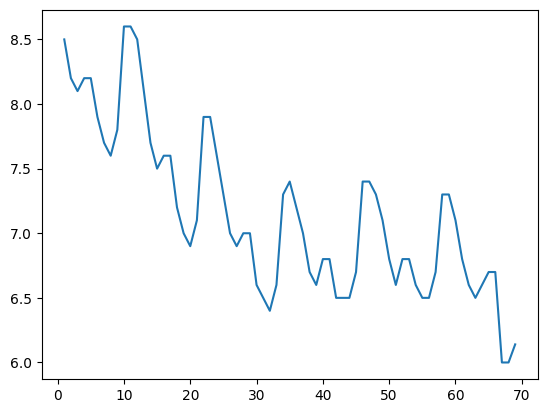

In [530]:
# Ausagbe im Diagramm
plt.plot(t,arbeitslose)

In [531]:
# FFT
N = len(arbeitslose)
# Sample Spacing
T = 1
yf = fft(arbeitslose)
#yf[np.abs(yf)<20] = 0
f = np.linspace(0,0.5*1/T,int(N/2))

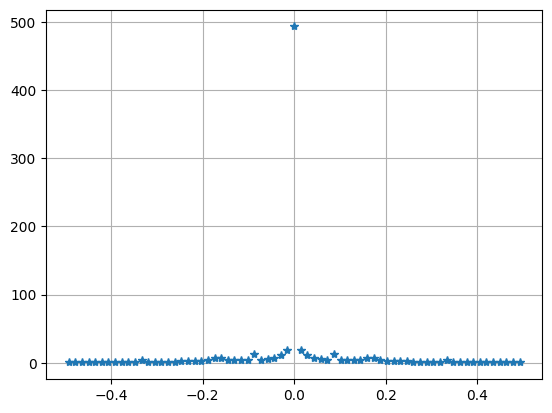

In [532]:
# Frequency Plot
f = fftfreq(N, 1/SAMPLE_RATE)
plt.plot(f, np.abs(yf),'*')
plt.grid()

In [533]:
# Inverse FFT
a_inverse = sp.ifft(yf)


C:\Users\TorstenSchmidt\AppData\Local\Temp\ipykernel_3276\4047675464.py:2: DeprecationWarning: scipy.ifft is deprecated and will be removed in SciPy 2.0.0, use scipy.fft.ifft instead
  a_inverse = sp.ifft(yf)


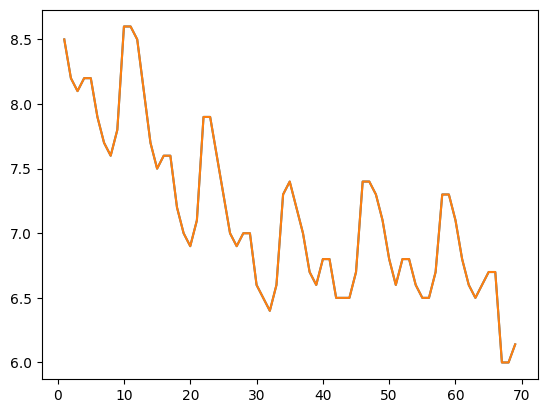

In [534]:
plt.plot(t,np.abs(arbeitslose),t,np.abs(a_inverse))

### Forecasting the time-series with fourier and polynomial fit

### A. Moving Average

In [535]:
# working with data as pd dataset
# data['moving_avg'] = data[1].rolling(window=10).mean()
# mov_avg = np.array(data['moving_avg'].dropna())
# t1 = np.array(data['moving_avg'].index)[np.isnan(data['moving_avg'])==False]
# plt.plot(t, data[1], t1, mov_avg)
#y_full =np.array(data[1])[0:127]

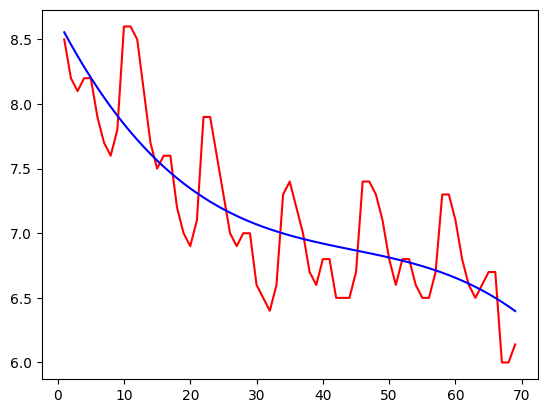

In [543]:
# Fitting Polynomial Regression to the moving average data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X = t.reshape(-1,1)

y = arbeitslose.reshape(-1,1)
lin_reg.fit(X, y)

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)

X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
#
# Visualizing the Polymonial Regression results
y_poly = pol_reg.predict(poly_reg.fit_transform(X))
y_poly = y_poly.ravel()
plt.plot(X, y, color='red')
plt.plot(X, y_poly, color='blue')


array([-0.05504262, -0.26176059, -0.27228613, -0.08652967, -0.00440169,
       -0.22581263, -0.35067296, -0.37889312, -0.11038356,  0.75494524,
        0.81718284,  0.77641879,  0.43274262,  0.08624389, -0.06298786,
        0.08513691,  0.13070774, -0.22618581, -0.3854542 , -0.44700789,
       -0.21075733,  0.62338701,  0.6555147 ,  0.38571527,  0.11407826,
       -0.15930678, -0.2343503 , -0.11096276, -0.08905461, -0.46853631,
       -0.54931832, -0.63131109, -0.41442507,  0.30142928,  0.4163415 ,
        0.23040114,  0.04369775, -0.24367913, -0.33163996, -0.1200952 ,
       -0.10895528, -0.39813068, -0.38753185, -0.37706924, -0.1666533 ,
        0.5438055 ,  0.55439672,  0.46520989,  0.27633457, -0.01213971,
       -0.2001234 ,  0.01247306,  0.02573919, -0.16023545, -0.24536132,
       -0.22954887, -0.01270856,  0.60524915,  0.62441382,  0.44487498,
        0.16672218, -0.00995504, -0.08506712,  0.04147547,  0.16976228,
        0.19988285, -0.46807326, -0.43401652, -0.25785739])

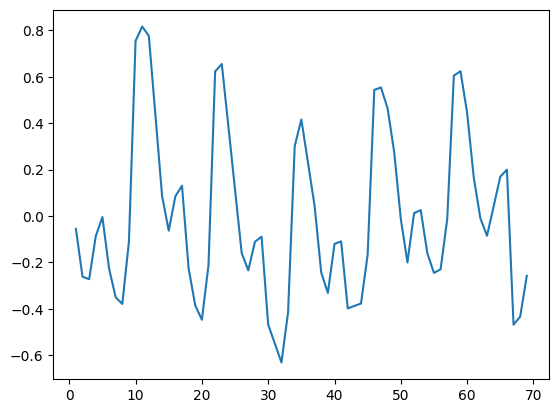

In [544]:
#Calculating the data - poly_data values
y_diff = y - pol_reg.predict(poly_reg.fit_transform(X))
plt.plot(t, y_diff)
SAMPLE_RATE = 1/(t1[2]-t1[1])
DURATION = y.size
y_diff = y_diff.flatten()
y_diff

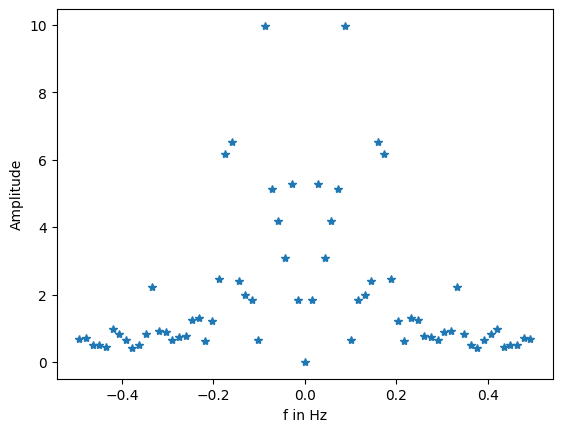

In [545]:
from scipy.fft import fft, fftfreq
N = int(SAMPLE_RATE * DURATION)
yf = fft(y_diff)
f = fftfreq(N, 1/SAMPLE_RATE)

plt.plot(f, np.abs(yf),'*')
plt.xlabel("f in Hz")
plt.ylabel("Amplitude")
plt.show()

In [546]:
t_ext = np.arange(0, 85, 1/SAMPLE_RATE)
print(t_ext)
print(t)
restored_sig = np.zeros(t_ext.size)
for i in range(f.size):
    ampli = np.abs(yf[i]) / N  # amplitude
    phase = np.angle(yf[i])  # phase
    restored_sig += ampli * np.cos(2 * np.pi * f[i] * t_ext + phase) # Elementaroszillationen



[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84.]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]


[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]
 [20.]
 [21.]
 [22.]
 [23.]
 [24.]
 [25.]
 [26.]
 [27.]
 [28.]
 [29.]
 [30.]
 [31.]
 [32.]
 [33.]
 [34.]
 [35.]
 [36.]
 [37.]
 [38.]
 [39.]
 [40.]
 [41.]
 [42.]
 [43.]
 [44.]
 [45.]
 [46.]
 [47.]
 [48.]
 [49.]
 [50.]
 [51.]
 [52.]
 [53.]
 [54.]
 [55.]
 [56.]
 [57.]
 [58.]
 [59.]
 [60.]
 [61.]
 [62.]
 [63.]
 [64.]
 [65.]
 [66.]
 [67.]
 [68.]
 [69.]
 [70.]
 [71.]
 [72.]
 [73.]
 [74.]
 [75.]
 [76.]
 [77.]
 [78.]
 [79.]
 [80.]
 [81.]
 [82.]
 [83.]
 [84.]]
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [

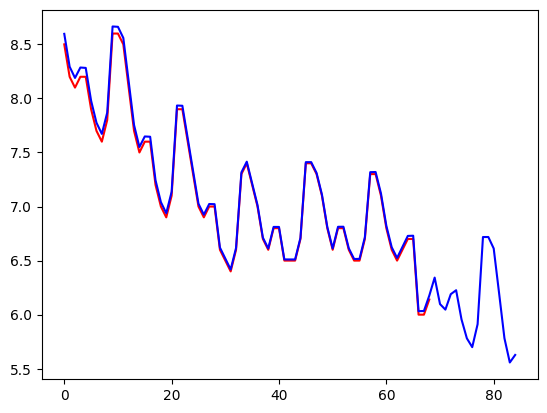

In [547]:
# Adding Polynomial Regression
X_ext = t_ext.reshape(-1,1)
y_ext = y_diff
print(X_ext)
X = t.reshape(-1,1)
print(X)
y = y.reshape(-1,1)

# Visualizing the Polymonial Regression results
y_poly = pol_reg.predict(poly_reg.fit_transform(X_ext))
y_poly = y_poly.ravel()
y_predict = restored_sig + y_poly
plt.plot(t-1, y, color='red')
plt.plot(X_ext, y_predict, color='blue')

In [459]:
t

array([  4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144], dtype=int64)